## Modelo de Series Temporales: Acciones MSFT
### Curso: Inteligencia de Negocios
### Docente: Ernesto Cancho Rodriguez

####Importamos las librerias a usar

In [1]:
pip install pmdarima

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 12.2 MB/s eta 0:00:00m eta 0:00:010:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 92.1 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [2]:
import time
import datetime
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt 
from sklearn.metrics import mean_absolute_error
from pmdarima.arima import auto_arima

### Definimos las propiedades de nuestro plot y el escalamiento
#### Establecemos el estilo de visualización en 'fivethirtyeight' para una trama moderna y suave, importamos la biblioteca rcParams de matplotlib.pylab para ajustar las propiedades de la forma y configuramos el tamaño de la forma en 20 unidades de ancho y 10 unidades de altura.


In [3]:
plt.style.use('fivethirtyeight')
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 20,10

#### Importamos la clase MinMaxScaler de la biblioteca sklearn.preprocessing para escalar los datos, creamos una instancia de MinMaxScaler y establecemos la escala de características en el rango 0-1.

In [4]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))

### Obtenemos la data de Microsoft (MFST)
#### Obtenemos datos de precios históricos para las acciones de 'MSFT' (Microsoft) de Yahoo Finance y los cargamos en un dataframe

In [5]:
ticker='MSFT'
period1 = int(time.mktime(datetime.datetime(2015, 1, 1, 0, 0).timetuple()))
period2 = int(time.mktime(datetime.datetime.now().timetuple()))
interval = '1d'
query_string = f'https://query1.finance.yahoo.com/v7/finance/download/{ticker}?period1={period1}&period2={period2}&interval={interval}&events=history&includeAdjustedClose=true'
df_dis = pd.read_csv(query_string)

### Seleccionamos nuestra data de entrenamiento y validación y entrenamos el modelo
#### Ordenamos los datos en DataFrame 'df_dis' en orden ascendente y los asignamos a la variable 'data'. Dividimos los datos en conjuntos de entrenamiento ('train') y conjuntos de validación ('valid'). A continuación, construimos un modelo AutoARIMA utilizando los datos de entrenamiento ('entrenamiento') y ajustamos el modelo. Generamos pronósticos utilizando el modelo personalizado y los almacenamos en un DataFrame 'forecast' indexado con la fecha correspondiente en el conjunto de validación.

In [6]:
data = df_dis.sort_index(ascending=True, axis=0)

train = data[:1551]
valid = data[1551:]

training = train['Close']
validation = valid['Close']

model = auto_arima(training, start_p=1, start_q=1,max_p=3, max_q=3, m=12,start_P=0, seasonal=True,d=1, D=1, trace=True,error_action='ignore',suppress_warnings=True)
model.fit(training)

forecast = model.predict(n_periods=351)
forecast = pd.DataFrame(forecast,index = valid.index,columns=['Prediction'])

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,1,1)[12]             : AIC=inf, Time=1.14 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=7954.766, Time=0.05 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=7500.926, Time=0.21 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=inf, Time=0.76 sec
 ARIMA(1,1,0)(0,1,0)[12]             : AIC=7867.456, Time=0.06 sec
 ARIMA(1,1,0)(2,1,0)[12]             : AIC=7247.546, Time=0.42 sec
 ARIMA(1,1,0)(2,1,1)[12]             : AIC=inf, Time=1.88 sec
 ARIMA(1,1,0)(1,1,1)[12]             : AIC=inf, Time=0.87 sec
 ARIMA(0,1,0)(2,1,0)[12]             : AIC=7357.395, Time=0.30 sec
 ARIMA(2,1,0)(2,1,0)[12]             : AIC=7247.107, Time=0.55 sec
 ARIMA(2,1,0)(1,1,0)[12]             : AIC=7490.184, Time=0.27 sec
 ARIMA(2,1,0)(2,1,1)[12]             : AIC=inf, Time=2.29 sec
 ARIMA(2,1,0)(1,1,1)[12]             : AIC=inf, Time=1.03 sec
 ARIMA(3,1,0)(2,1,0)[12]             : AIC=7243.416, Time=0.61 sec
 ARIMA(3,1,0)(1,1,0)[12]             : AIC=7489.9

### Calculamos el RMSE

In [12]:
rms=np.sqrt(np.mean(np.power((np.array(valid['Close'])-np.array(forecast['Prediction'])),2)))
rms

nan


### Visualizamos el plot

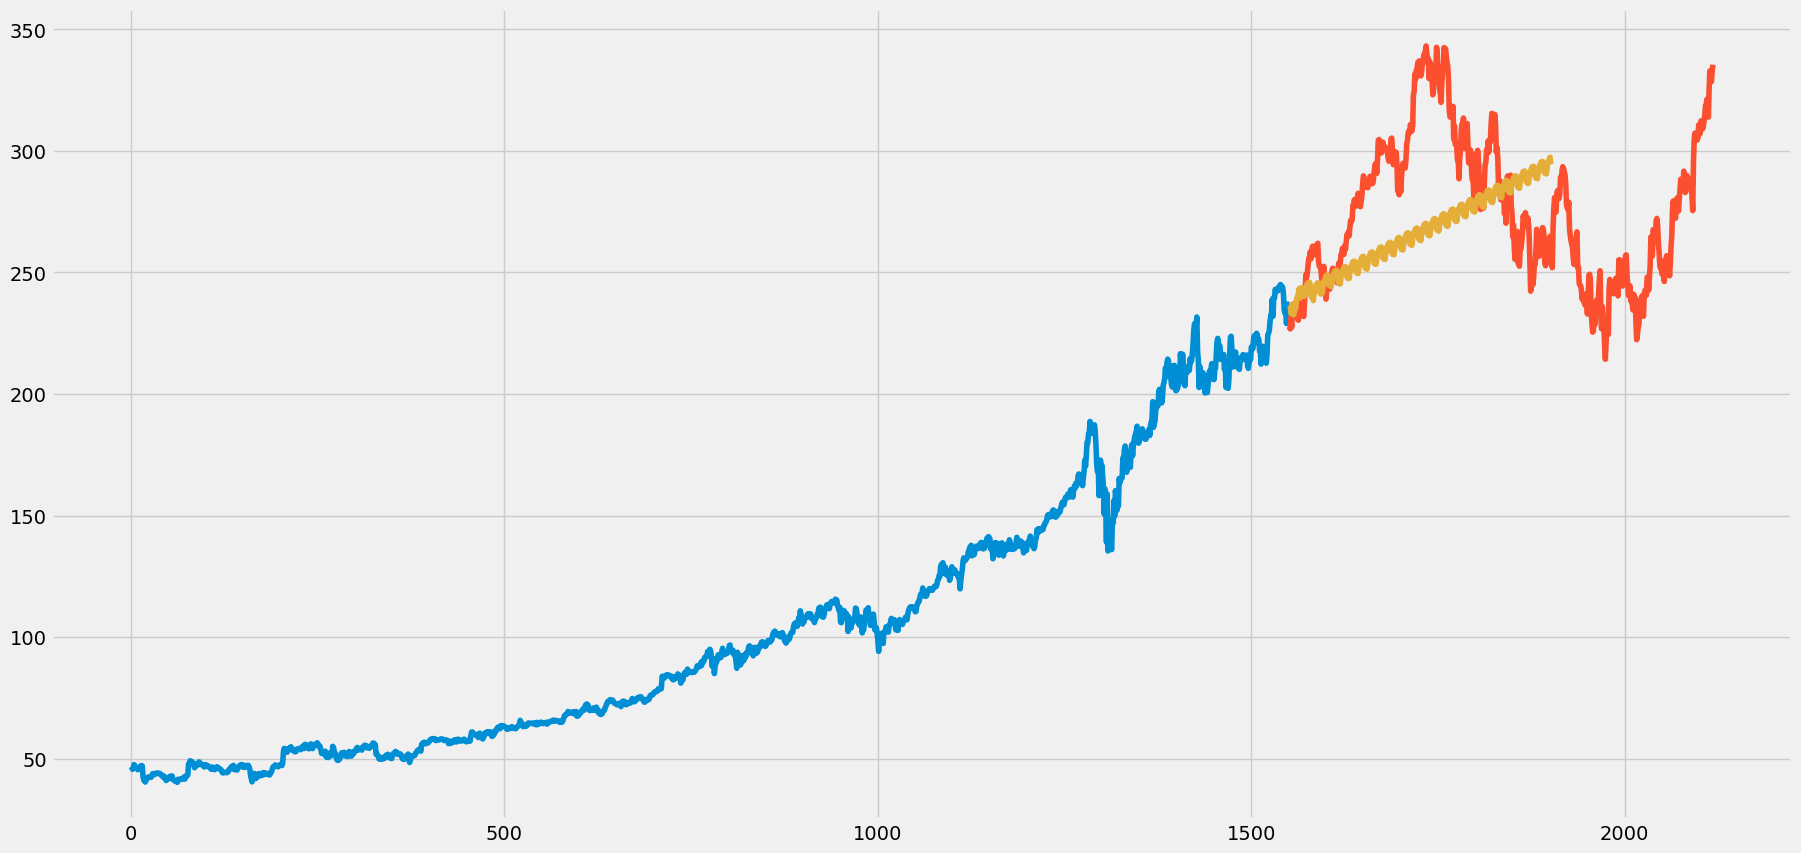

In [11]:
plt.plot(train['Close'])
plt.plot(valid['Close'])
plt.plot(forecast['Prediction'])

### Análisis de residuos

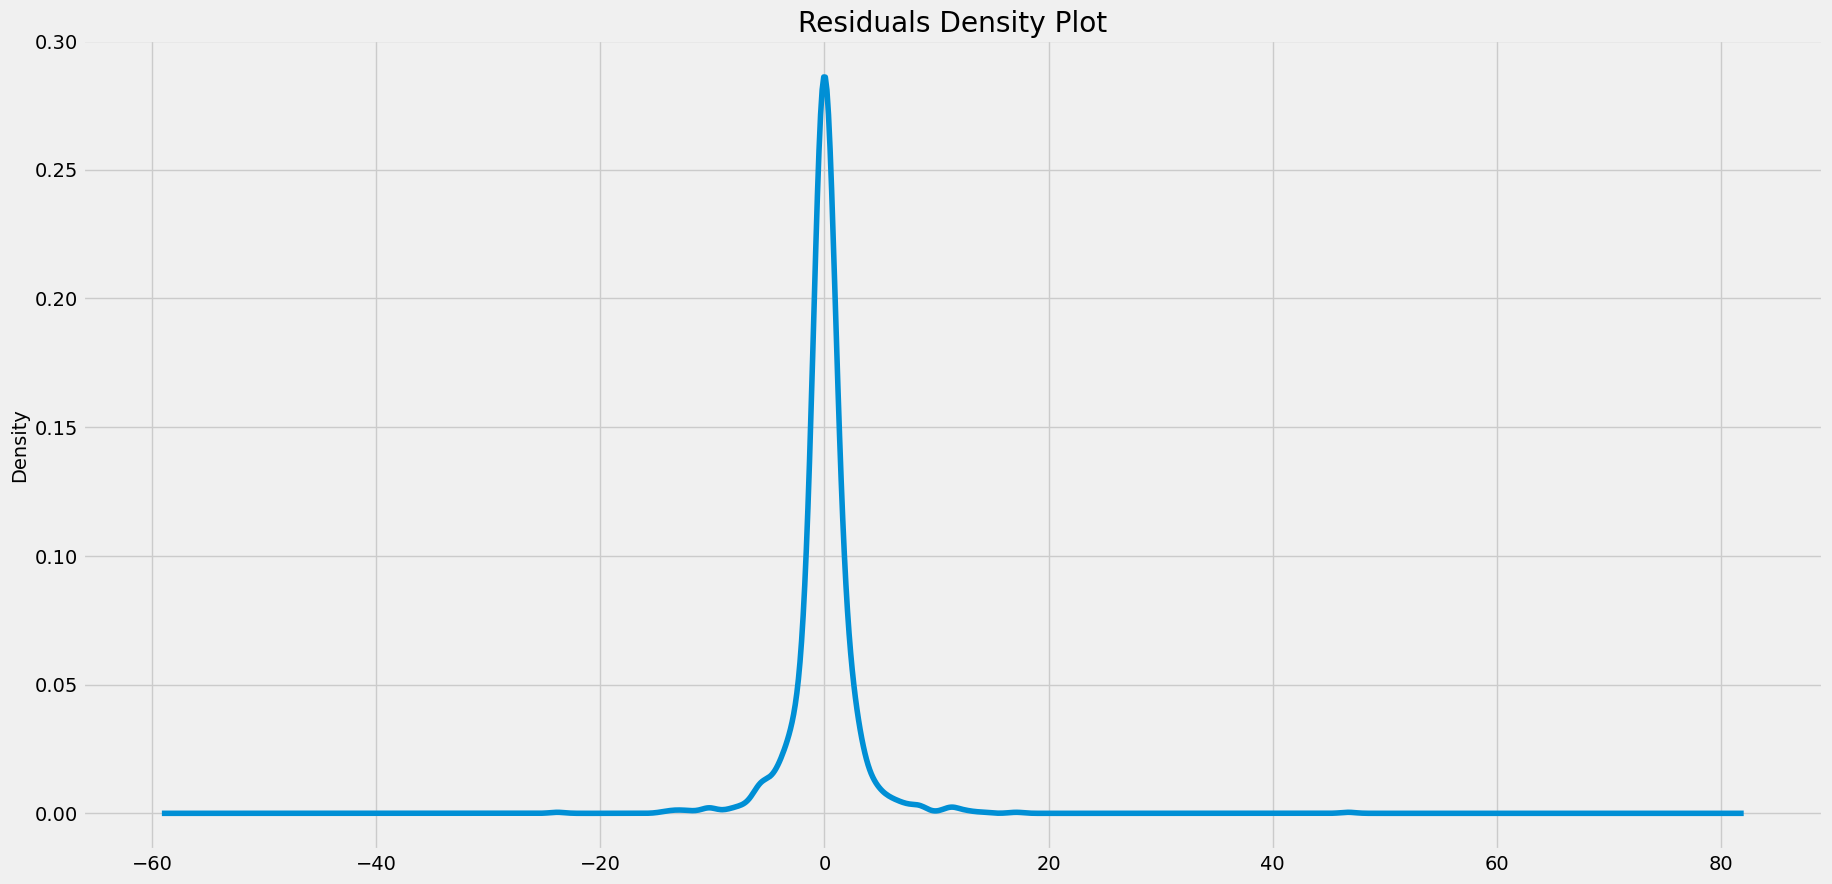

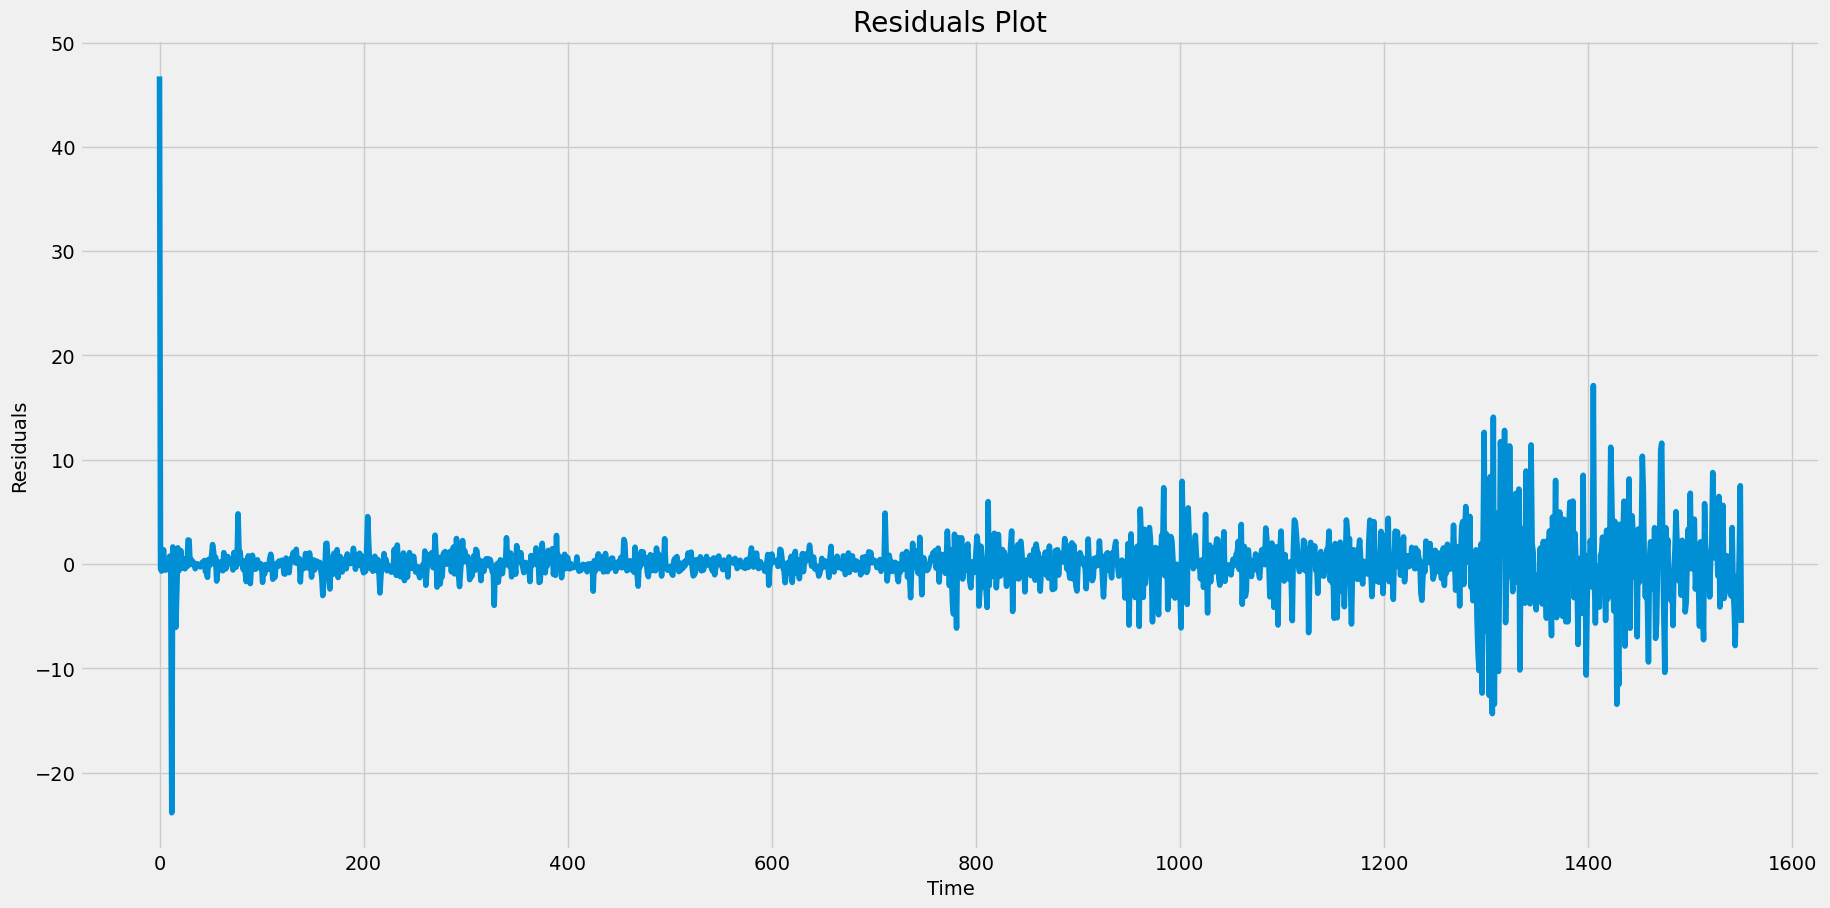

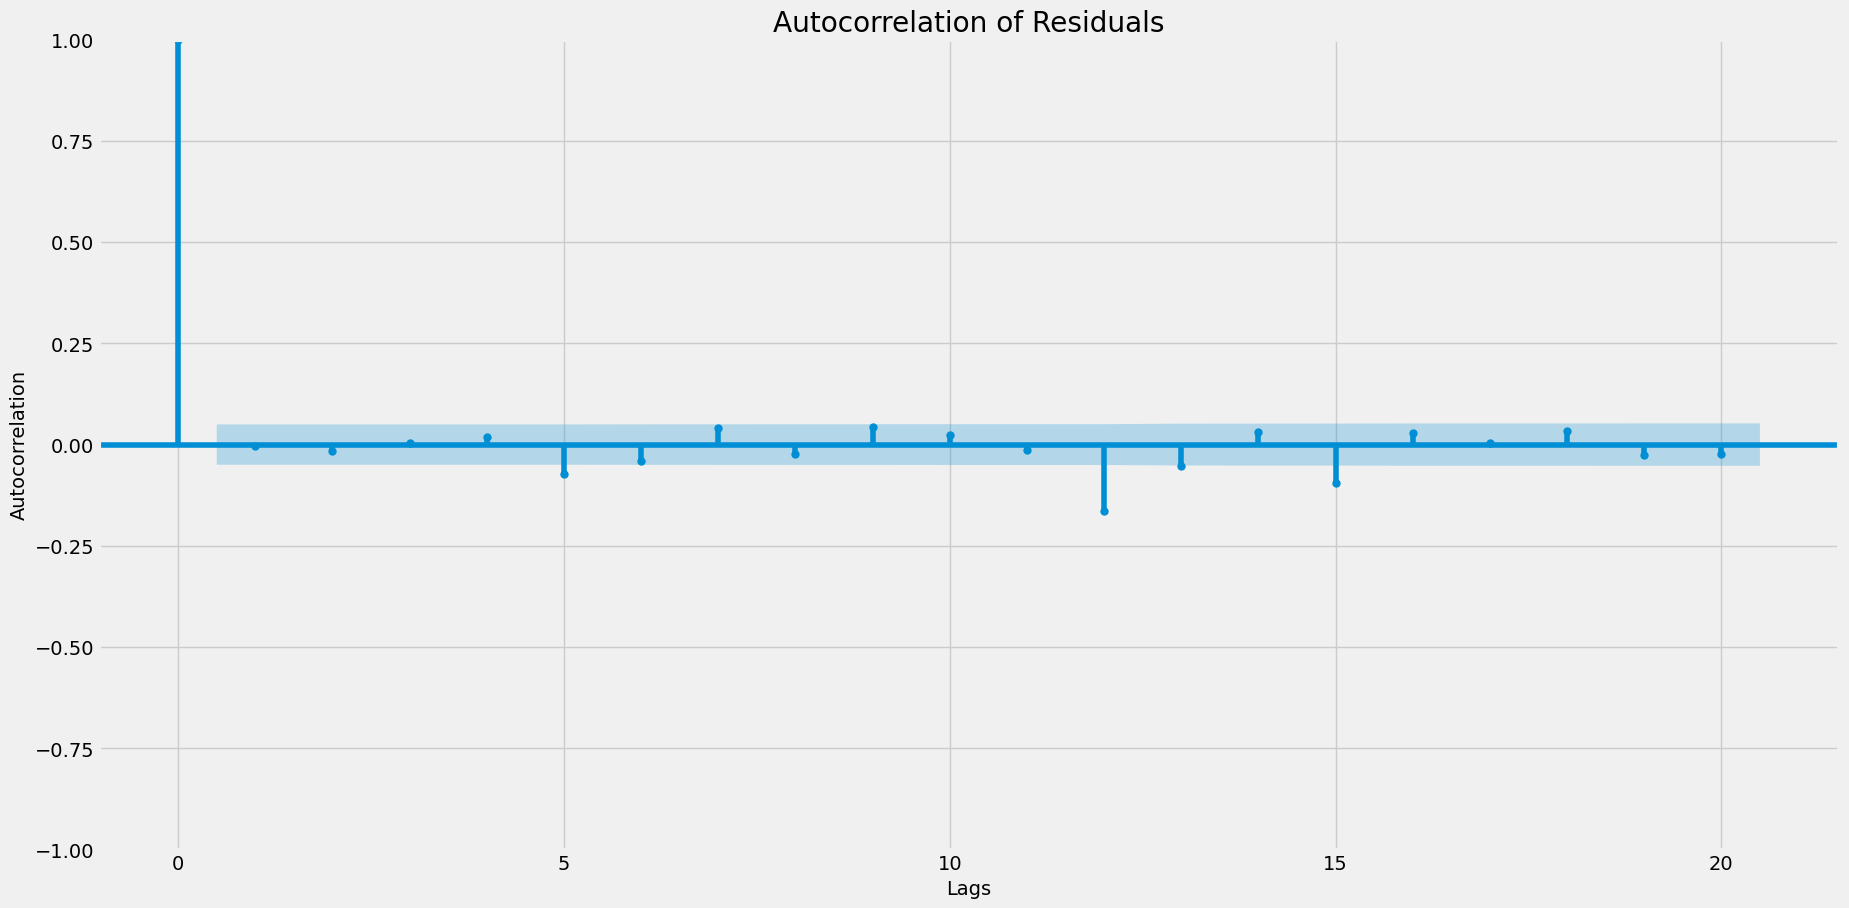

In [15]:
from statsmodels.graphics.tsaplots import plot_acf

residuals = model.resid()
residuals.plot(kind='kde')
plt.title('Residuals Density Plot')
plt.show()

residuals.plot()
plt.title('Residuals Plot')
plt.xlabel('Time')
plt.ylabel('Residuals')
plt.show()

# Prueba de autocorrelación de los residuos
acf = plot_acf(residuals, lags=20)
plt.title('Autocorrelation of Residuals')
plt.xlabel('Lags')
plt.ylabel('Autocorrelation')
plt.show()